In [64]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [86]:
df = pd.read_csv("/Users/glmarschmann/.julia/dev/DEBmicroTrait/files/output/isolates_mixed_medium.csv")
df = df.loc[(df.response == "positive") | (df.response == "negative")]
df.head()

,monomer,ontology,isolate,response,percent_uptake
0,2-aminoisobutyric acid,Amino acids,Acidobacteriaceae bacterium URHE0068,positive,0.999190
1,2-aminoisobutyric acid,Amino acids,Bacillus sp. URHB0009,negative,0.995375
3,2-aminoisobutyric acid,Amino acids,Bradyrhizobium sp. URHA0002,positive,0.999989
4,2-aminoisobutyric acid,Amino acids,Bradyrhizobium sp. URHA0013,positive,0.999994
5,2-aminoisobutyric acid,Amino acids,Bradyrhizobium sp. URHD0069,positive,1.000000


In [87]:
df_bge = pd.read_csv("/Users/glmarschmann/.julia/dev/DEBmicroTrait/files/output/isolates_batch_model_BGE.csv")
df_bge.head()

,isolate,class,phylum,response,mingt,rrn,genomesize,monomer,ontology,BGE,rgrowth,BP,BR
0,Acidobacteriaceae bacterium URHE0068,Acidobacteria,Acidobacteria,positive,7.00,3,6679185,2-aminoisobutyric acid,Amino acids,0.591660,0.059213,7.888702e-09,2.961760e-09
1,Bacillus sp. URHB0009,Bacilli,Firmicutes,negative,1.31,20,5377210,2-aminoisobutyric acid,Amino acids,0.380744,0.127318,3.192556e-08,1.684607e-08
2,Blastococcus sp. URHD0036,Actinobacteria,Actinobacteria,undefined,2.78,8,5177578,2-aminoisobutyric acid,Amino acids,0.475350,0.097510,1.560388e-08,7.346933e-09
3,Bradyrhizobium sp. URHA0002,Alphaproteobacteria,Proteobacteria,positive,6.09,3,6972827,2-aminoisobutyric acid,Amino acids,0.590325,0.057814,7.447495e-09,3.213237e-09
4,Bradyrhizobium sp. URHA0013,Alphaproteobacteria,Proteobacteria,positive,5.73,3,7193102,2-aminoisobutyric acid,Amino acids,0.590507,0.060674,7.873335e-09,3.351377e-09


In [88]:
df_merge = df.merge(df_bge)
df_merge.head()

,monomer,ontology,isolate,response,percent_uptake,class,phylum,mingt,rrn,genomesize,BGE,rgrowth,BP,BR
0,2-aminoisobutyric acid,Amino acids,Acidobacteriaceae bacterium URHE0068,positive,0.999190,Acidobacteria,Acidobacteria,7.00,3,6679185,0.591660,0.059213,7.888702e-09,2.961760e-09
1,2-aminoisobutyric acid,Amino acids,Bacillus sp. URHB0009,negative,0.995375,Bacilli,Firmicutes,1.31,20,5377210,0.380744,0.127318,3.192556e-08,1.684607e-08
2,2-aminoisobutyric acid,Amino acids,Bradyrhizobium sp. URHA0002,positive,0.999989,Alphaproteobacteria,Proteobacteria,6.09,3,6972827,0.590325,0.057814,7.447495e-09,3.213237e-09
3,2-aminoisobutyric acid,Amino acids,Bradyrhizobium sp. URHA0013,positive,0.999994,Alphaproteobacteria,Proteobacteria,5.73,3,7193102,0.590507,0.060674,7.873335e-09,3.351377e-09
4,2-aminoisobutyric acid,Amino acids,Bradyrhizobium sp. URHD0069,positive,1.000000,Alphaproteobacteria,Proteobacteria,5.32,3,6793945,0.594059,0.068539,9.416452e-09,3.240595e-09


In [89]:
groups = df_merge[["monomer", "response", "percent_uptake", "BGE"]].groupby(by=["monomer", "response"], dropna=False).median().agg(lambda
                             x: list(x)).reset_index()
groups.head()

,monomer,response,percent_uptake,BGE
0,"2,3-Dihydroxybenzoic acid",negative,0.953350,0.390992
1,"2,3-Dihydroxybenzoic acid",positive,0.998747,0.505829
2,2-aminoisobutyric acid,negative,0.999801,0.456528
3,2-aminoisobutyric acid,positive,0.999994,0.569965
4,3-Dehydroshikimic acid,negative,0.947163,0.390983


In [90]:
groups[["diff_percent_uptake", "diff_BGE"]]= groups[["monomer", "percent_uptake", "BGE"]].groupby("monomer").diff()

In [91]:
groups["diffup"]= groups["diff_percent_uptake"]/groups["percent_uptake"]*100
groups["diffBGE"]= groups["diff_BGE"]/groups["BGE"]*100
groups.dropna()

,monomer,response,percent_uptake,BGE,diff_percent_uptake,diff_BGE,diffup,diffBGE
1,"2,3-Dihydroxybenzoic acid",positive,0.998747,0.505829,0.045396,0.114837,4.545344,22.702722
3,2-aminoisobutyric acid,positive,0.999994,0.569965,0.000193,0.113437,0.019298,19.902465
5,3-Dehydroshikimic acid,positive,0.998349,0.505821,0.051186,0.114838,5.127018,22.703210
7,5-aminovaleric acid,positive,0.999998,0.610496,0.000059,0.123085,0.005905,20.161503
9,D-ribose,positive,0.999973,0.575598,0.000165,0.102565,0.016521,17.818887
...,...,...,...,...,...,...,...,...
155,valine,positive,0.999998,0.610496,0.000059,0.123085,0.005905,20.161503
157,vanillic acid,positive,0.998474,0.525084,0.051061,0.115193,5.113882,21.937955
159,vanillin,positive,0.998803,0.530001,0.046910,0.115217,4.696582,21.739069
161,xanthine,positive,0.968639,0.236166,-0.021984,0.026699,-2.269581,11.305256


In [93]:
df_sig = groups[(groups.diffup > 3) | (groups.diffup < -1)]

In [94]:
df_sig = df_sig.sort_values(by=['diffup'], ascending=False)
df_sig.shape

(39, 8)

In [95]:
df_sig

,monomer,response,percent_uptake,BGE,diff_percent_uptake,diff_BGE,diffup,diffBGE
79,indole-3-acetic acid,positive,0.608499,0.417544,0.149025,0.220692,24.490569,52.854822
135,thiamine,positive,0.999366,0.556619,0.080351,0.114973,8.040198,20.655674
27,abscisic acid,positive,0.999813,0.567081,0.078281,0.114667,7.829537,20.220585
47,biotin,positive,0.998713,0.546173,0.075810,0.115159,7.590745,21.084714
133,taurine,positive,0.996017,0.298913,0.073458,0.087530,7.375206,29.282901
109,pantothenic acid,positive,0.998348,0.539220,0.068426,0.115218,6.853880,21.367531
123,sinapyl alcohol,positive,0.999480,0.551880,0.065136,0.115066,6.516943,20.849801
87,jasmonic acid,positive,0.999679,0.556631,0.064497,0.114965,6.451805,20.653755
131,syringic acid,positive,0.998734,0.534367,0.060813,0.115237,6.088991,21.565076
145,trans-ferulic acid,positive,0.999305,0.544996,0.060521,0.115169,6.056339,21.132095


# Relative uptake

In [96]:
fig_height = 2.5                         # inches  
golden_mean = (np.sqrt(5)-1.0)/2.0      # Aesthetic ratio
fig_width= 4.8     # height in inches
dpi = 300.0                             # Convert inch to pt

# Margins are specified as a fraction of axes size.
# May need to adjust (especially left and bottom) to accomodate axes labels/tickmarks
leftmargin = 0.15
bottommargin = 0.2
rightmargin = 0.05
topmargin = 0.1
# These two parameters are used for adjusting spacing between subplots (when used)
wspace = 0.2
hspace = 0.2

fig_size =  [fig_width,fig_height]
params = {'backend': 'svg',
          'axes.labelsize': 4,
          'axes.titlesize': 7,
          'legend.fontsize': 10,
          'xtick.labelsize': 4,
          'ytick.labelsize': 4,
          'figure.figsize': fig_size,
          'text.usetex': False, 
          'font.family':'sans-serif',
          'font.sans-serif':'Arial',
          'svg.fonttype':'none'}

<Axes:>

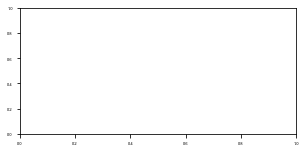

In [97]:
plt.rcParams.update(params)
plt.figure(1)
plt.clf()
plt.axes([leftmargin,
            bottommargin,
            1.0 - rightmargin-leftmargin,
            1.0 - topmargin-bottommargin])

[Text(0, 0.5, 'Metabolite uptake (positive - negative responder) [%]'),
 Text(0.5, 0, '')]

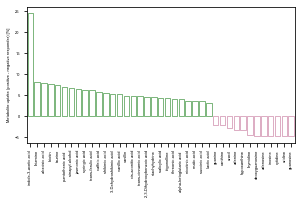

In [99]:
ax = plt.gca()
ax = sns.barplot(x="monomer", y="diffup", data=df_sig, dodge=True, lw=0.5)
for i, bar in enumerate(ax.patches):
    if i<27:
        bar.set_color("w")
        bar.set_edgecolor("#007100")
    else:
        bar.set_color("w")
        bar.set_edgecolor("#bd5e8b")
#ax.set(ylabel='', rotation=90)

plt.xticks(range(0,39), df_sig["monomer"], rotation='vertical')
ax.set(ylabel='Metabolite uptake (positive - negative responder) [%]', xlabel="")
#ax.bar_label(ax.containers[0], labels=['lc','lc', 'lc','','','','','','','','lc','lc','lc','','','lc','lc','','','lc','','lc','lc','lc','','','','','','','','','lc','lc','','','lc','','lc'], padding=3, size=4)
#plt.savefig("/Users/glmarschmann/.julia/dev/DEBmicroTrait_Files/pnas/figures_main/isolates_mixed_medium_main_horiz_long1.svg", format='svg')

# CUE

In [114]:
df_sig["response"][df_sig["diffup"] < 0] = "negative"

/Users/glmarschmann/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [115]:
df_bge = df_bge.loc[(df_bge.response == "positive") | (df_bge.response == "negative")]
df_bge_grouped = df_bge.groupby(["monomer", "response"]).median().agg(lambda x: list(x)).reset_index()

In [116]:
d = (
    df_bge_grouped.merge(df_sig, 
              on=['monomer'],
              how='left', 
              indicator=True)
    .query('_merge == "both"')
    .drop(columns='_merge')
)

In [117]:
d.head()

,monomer,response_x,mingt,rrn,genomesize,BGE_x,rgrowth,BP,BR,response_y,percent_uptake,BGE_y,diff_percent_uptake,diff_BGE,diffup,diffBGE
0,"2,3-Dihydroxybenzoic acid",negative,3.16,9.0,5974969.0,0.390992,0.014717,1.437970e-09,1.307751e-09,positive,0.998747,0.505829,0.045396,0.114837,4.545344,22.702722
1,"2,3-Dihydroxybenzoic acid",positive,5.32,3.0,6657122.0,0.505829,0.020320,2.232295e-09,1.197374e-09,positive,0.998747,0.505829,0.045396,0.114837,4.545344,22.702722
4,3-Dehydroshikimic acid,negative,3.16,9.0,5974969.0,0.390983,0.014732,1.437904e-09,1.309391e-09,positive,0.998349,0.505821,0.051186,0.114838,5.127018,22.703210
5,3-Dehydroshikimic acid,positive,5.32,3.0,6657122.0,0.505821,0.020296,2.232043e-09,1.195909e-09,positive,0.998349,0.505821,0.051186,0.114838,5.127018,22.703210
26,abscisic acid,negative,3.16,9.0,5974969.0,0.452414,0.014717,1.438098e-09,1.093090e-09,positive,0.999813,0.567081,0.078281,0.114667,7.829537,20.220585


In [118]:
fig_height = 3/2.1                       # inches  
golden_mean = (np.sqrt(5)-1.0)/2.0      # Aesthetic ratio
fig_width = 5/2.5     # height in inches
dpi = 300.0                             # Convert inch to pt

# Margins are specified as a fraction of axes size.
# May need to adjust (especially left and bottom) to accomodate axes labels/tickmarks
leftmargin = 0.15
bottommargin = 0.2
rightmargin = 0.05
topmargin = 0.1
# These two parameters are used for adjusting spacing between subplots (when used)
wspace = 0.2
hspace = 0.2

fig_size =  [fig_width,fig_height]
params = {'backend': 'svg',
          'axes.labelsize': 5,
          'axes.titlesize': 12,
          'legend.fontsize': 5,
          'xtick.labelsize': 5,
          'ytick.labelsize': 5,
          'figure.figsize': fig_size,
          'text.usetex': False, 
          'font.family':'sans-serif',
          'font.sans-serif':'Arial',
          'svg.fonttype':'none'}

<Axes:>

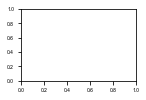

In [119]:
plt.rcParams.update(params)
plt.figure(1)
plt.clf()
plt.axes([leftmargin,
            bottommargin,
            1.0 - rightmargin-leftmargin,
            1.0 - topmargin-bottommargin])

[Text(0, 0.5, 'Carbon use efficiency [-]'), Text(0.5, 0, '')]

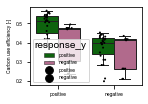

In [120]:
ax = plt.gca()
ax = sns.boxplot(x="response_x", y="BGE_x", hue="response_y", data=d, palette =["#007100", '#bd5e8b'], showfliers=False, linewidth=1, order=["positive", "negative"])
ax = sns.stripplot(x="response_x", y="BGE_x", hue="response_y", palette =["k", 'k'], data=d, dodge=True, size=2, order=["positive", "negative"])
ax.set(ylabel='Carbon use efficiency [-]', xlabel='')
#plt.savefig("/Users/glmarschmann/.julia/dev/DEBmicroTrait/pnas/figures_main/isolates_mixed_medium_bge.svg", format='svg')

# Statistics

In [121]:
df_negative_u = d.loc[(d.response_x == "negative")]
df_positive_u = d.loc[(d.response_x == "positive")]
df_negative_up = df_negative_u.loc[(df_negative_u.response_y == "positive")]
df_negative_un = df_negative_u.loc[(df_negative_u.response_y == "negative")]
df_positive_up = df_positive_u.loc[(df_positive_u.response_y == "positive")]
df_positive_un = df_positive_u.loc[(df_positive_u.response_y == "negative")]

In [122]:
from scipy import stats

In [123]:
stats.kruskal(df_positive_up["BGE_x"], df_positive_un["BGE_x"])

KruskalResult(statistic=9.633333333333354, pvalue=0.0019107751373644167)

In [124]:
stats.kruskal(df_negative_up["BGE_x"], df_negative_un["BGE_x"])

KruskalResult(statistic=0.8333333333333428, pvalue=0.361310428526176)

In [125]:
stats.kruskal(df_positive_u["BGE_x"], df_negative_u["BGE_x"])

KruskalResult(statistic=23.636906099418297, pvalue=1.163347958331681e-06)